In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install seaborn

In [4]:
!pip install sklearn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 2. Load datasets

In [7]:
# Load california datasets from seaborn

california = fetch_california_housing()

# Converting the data to dataframe
california_df = pd.DataFrame(data = california.data,columns = california.feature_names)

# Add the target variable to dataframe
california_df['MedHousVal'] = california.target

# first 5 records
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHousVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 3.Exploratory Data Analysis

Step 3 a): Check shape of the data.

In [8]:
# print the shape of the dataframe
print("Data shape:",california_df.shape)

Data shape: (20640, 9)


Step 3 b): Show Descriptive statics of each numerical column

In [9]:
california_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHousVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


Step 3 c): Checking for missing values in dataframe

In [10]:
california_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedHousVal    0
dtype: int64

Step 3 d): Create correlation heatmap

In [11]:
corr_matrix = california_df.corr()

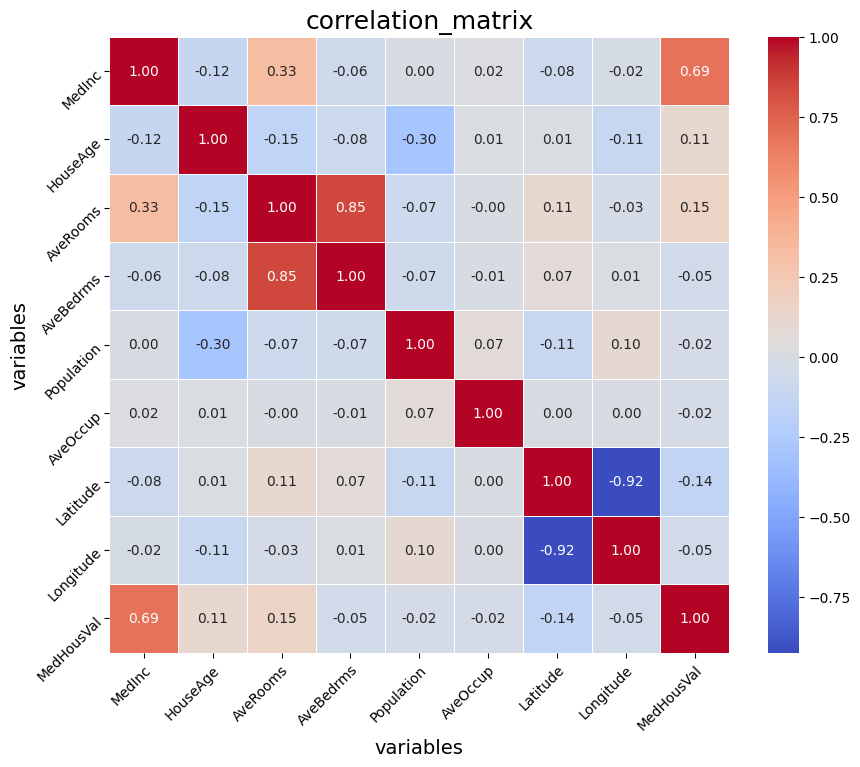

In [12]:
# Create heatmap
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('correlation_matrix',fontsize=18)
plt.xlabel("variables",fontsize=14)
plt.ylabel("variables",fontsize=14)

# customize the tick tables
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right',rotation_mode='anchor')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45,ha='right',rotation_mode='anchor')
plt.show()

In [33]:
# vif
# Multicollinearity between independent variable

X = california_df.drop('MedHousVal',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [34]:
california_df.drop('Longitude',axis=1,inplace=True)

In [35]:
# vif
# Multicollinearity between independent variable

X = california_df.drop('MedHousVal',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0      MedInc   9.865861
1    HouseAge   6.880512
2    AveRooms  42.192223
3   AveBedrms  39.768396
4  Population   2.793169
5    AveOccup   1.094908
6    Latitude  22.498755


In [38]:
california_df.drop('AveRooms',axis=1,inplace=True)

In [39]:
# vif
# Multicollinearity between independent variable

X = california_df.drop('MedHousVal',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0      MedInc   5.036342
1    HouseAge   6.660725
2   AveBedrms   6.430073
3  Population   2.752356
4    AveOccup   1.094801
5    Latitude  21.922515


In [44]:
california_df.drop('Latitude',axis=1,inplace=True)
# vif
# Multicollinearity between independent variable

X = california_df.drop('MedHousVal',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


      feature       VIF
0      MedInc  3.801038
1    HouseAge  3.769898
2   AveBedrms  4.263506
3  Population  2.222516
4    AveOccup  1.094644


Step 3(e): Visualize the histogram using target varible

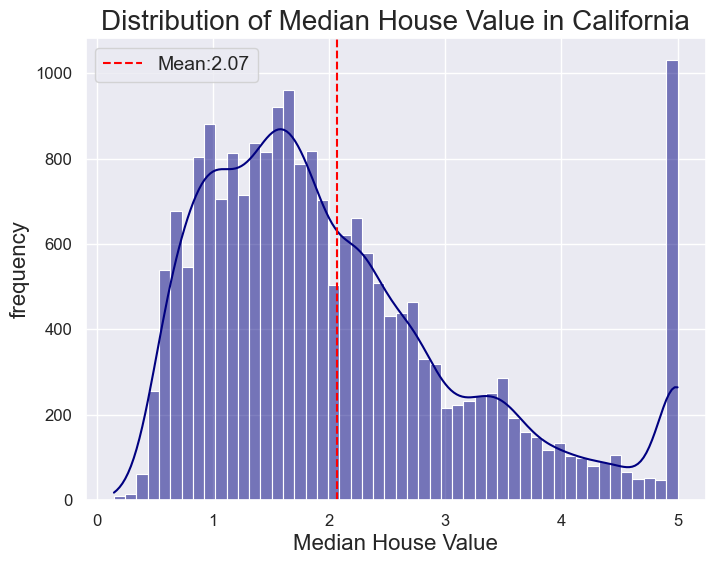

In [13]:
# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=california_df,x='MedHousVal',kde=True,bins=50,color='navy')

# Set x and y axis labels and title
plt.xlabel("Median House Value",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of Median House Value in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = california_df['MedHousVal'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

In [14]:
df1 = california_df.copy()

Step 3)(e)(1) Right skewed resolving: Log transform the target variable

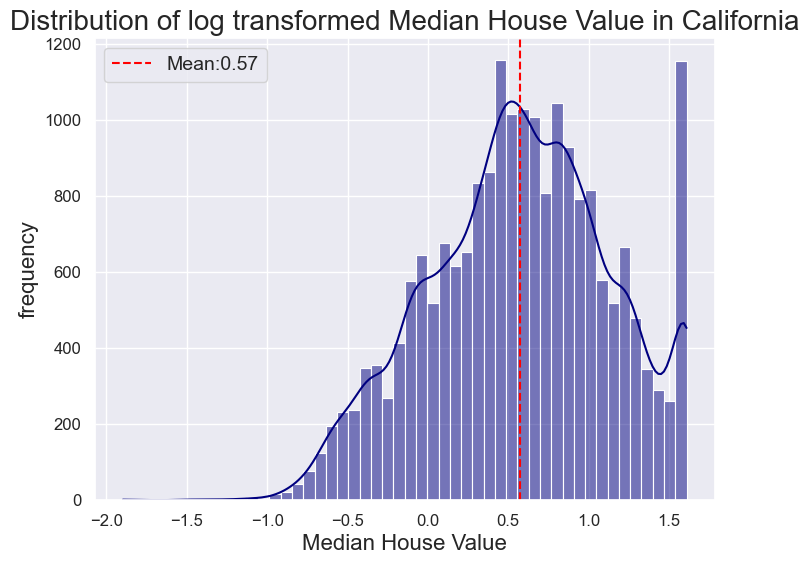

In [15]:
df1['MedHousVal_log'] = np.log(california_df['MedHousVal'])

# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df1,x='MedHousVal_log',kde=True,bins=50,color='navy')

# Set x and y axis labels and title
plt.xlabel("Median House Value",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of log transformed Median House Value in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = df1['MedHousVal_log'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

Step 3) (e) 2: Right skewed resolving: Inverse transformation on target variable

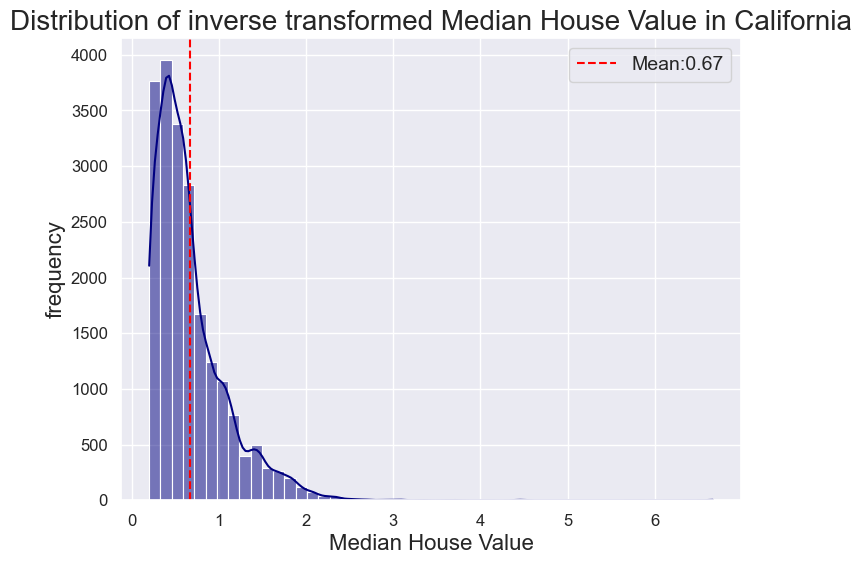

In [16]:
# Apply Inverse transform to the target variable
df1['MedHousVal_inv'] = 1/df1['MedHousVal']

# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df1,x='MedHousVal_inv',kde=True,bins=50,color='navy')

# Set x and y axis labels and title
plt.xlabel("Median House Value",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of inverse transformed Median House Value in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = df1['MedHousVal_inv'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

Step 3) (e) 3): Resolve skew: square root transformation

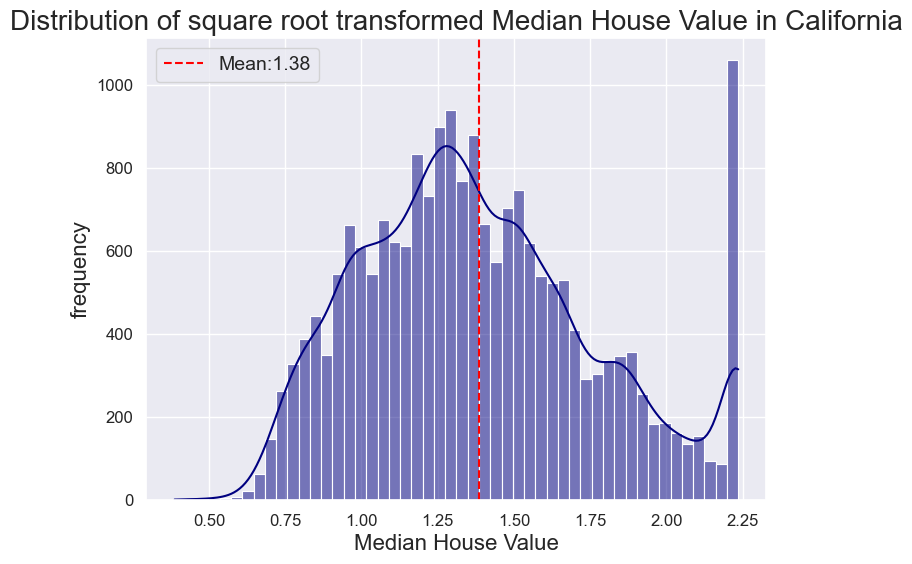

In [17]:
df1['MedHousVal_sqrt'] = np.sqrt(df1['MedHousVal'])

# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df1,x='MedHousVal_sqrt',kde=True,bins=50,color='navy')

# Set x and y axis labels and title
plt.xlabel("Median House Value",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of square root transformed Median House Value in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = df1['MedHousVal_sqrt'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

Step 3)(f): Visualize the distribution of predictor variable using histogram 

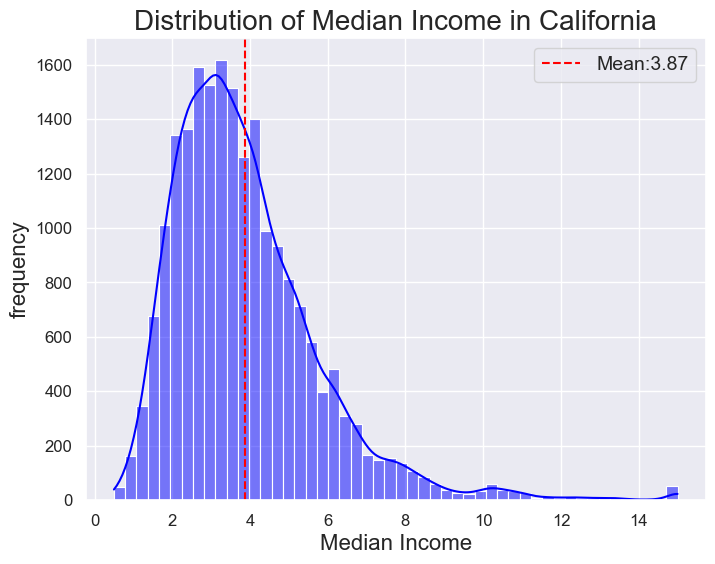

In [18]:
# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df1,x='MedInc',kde=True,bins=50,color='blue')

# Set x and y axis labels and title
plt.xlabel("Median Income",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of Median Income in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = california_df['MedInc'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

Step 3)(f)i): Resolve outliers using inter quartile range

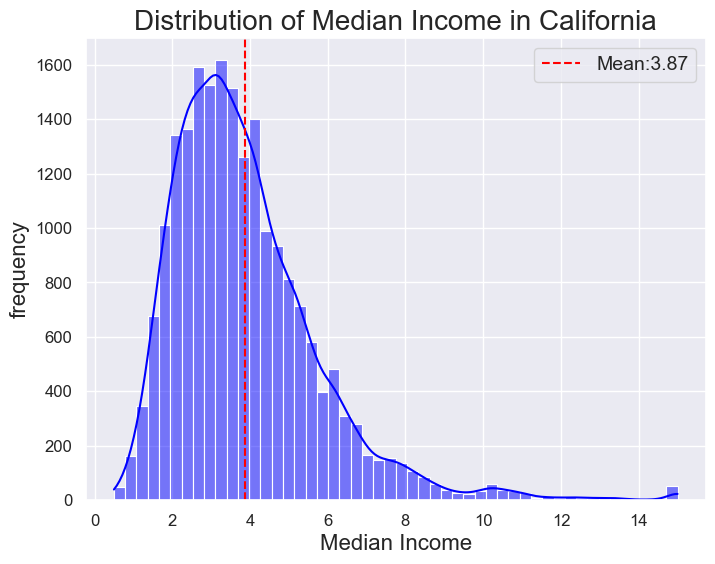

In [19]:
# Calculate first and third quartile
Q1 = df1['MedInc'].quantile(0.25)
Q3 = df1['MedInc'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds for quartile detection
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Create new dataframe without outliers
california_df_no_outliers = df1[(df1['MedInc']>= lower_bound)]

# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=california_df_no_outliers,x='MedInc',kde=True,bins=50,color='blue')

# Set x and y axis labels and title
plt.xlabel("Median Income",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Distribution of Median Income in California",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean = df1['MedInc'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'Mean:{mean:0.2f}')
plt.legend(fontsize=14)
plt.show()

In [20]:
california_df_no_outliers.shape

(20640, 12)

In [45]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup',
       'MedHousVal'],
      dtype='object')

In [49]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
california_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']] = scaler.fit_transform(california_df[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']])

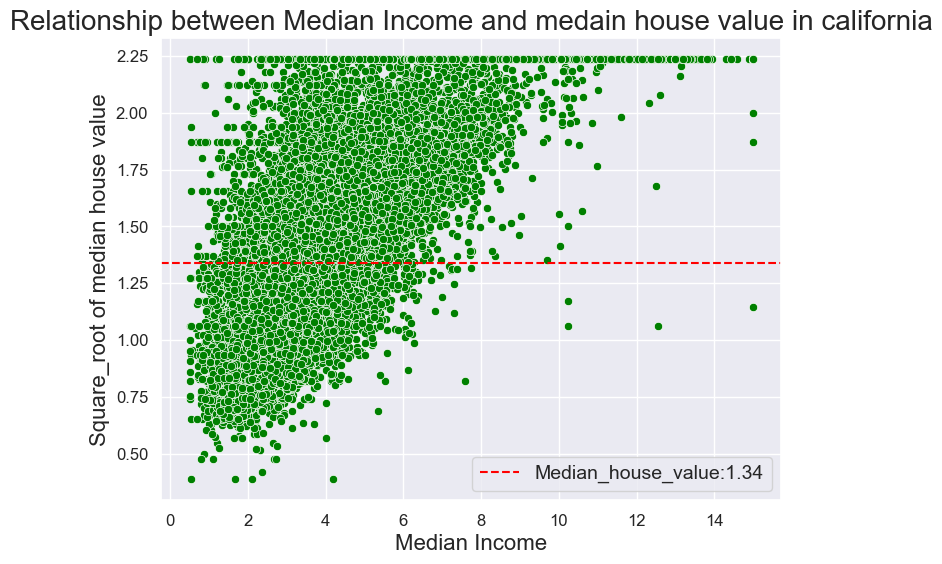

In [21]:
# Set figure and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)

# Create Scatter plot
sns.scatterplot(data=california_df_no_outliers, x='MedInc',y='MedHousVal_sqrt',color='green')

# Set x and y axis labels and title
plt.xlabel("Median Income",fontsize=16)
plt.ylabel("Square_root of median house value",fontsize=16)
plt.title("Relationship between Median Income and medain house value in california",fontsize=20)

#Customize x-axis and y-axis tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for median
median_house_value = df1['MedHousVal_sqrt'].median()
plt.axhline(median_house_value,color='red',linestyle='--',label=f'Median_house_value:{median_house_value:0.2f}')
plt.legend(fontsize=14)
plt.show()

Step 4): Do train test split in ratio 80:20

In [22]:
X = california_df_no_outliers.drop(["MedHousVal"],axis=1)
y =california_df_no_outliers.MedHousVal

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Model Building
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train

array([4.95470063, 2.71822842, 1.95968633, ..., 2.9116234 , 4.82223103,
       0.71263421])

In [24]:
# Model Evaluation

MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 0.00037519896281037606
RMSE= 0.019370053247484274
R2_Score= 0.9997196600774164


In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Model Building
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
y_pred_test

array([1.35483976, 2.42602722, 2.00416159, ..., 1.26893642, 2.6093021 ,
       1.66868353])

In [26]:
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 0.00038597180367829555
RMSE= 0.019646165113789905
R2_Score= 0.999703999116079


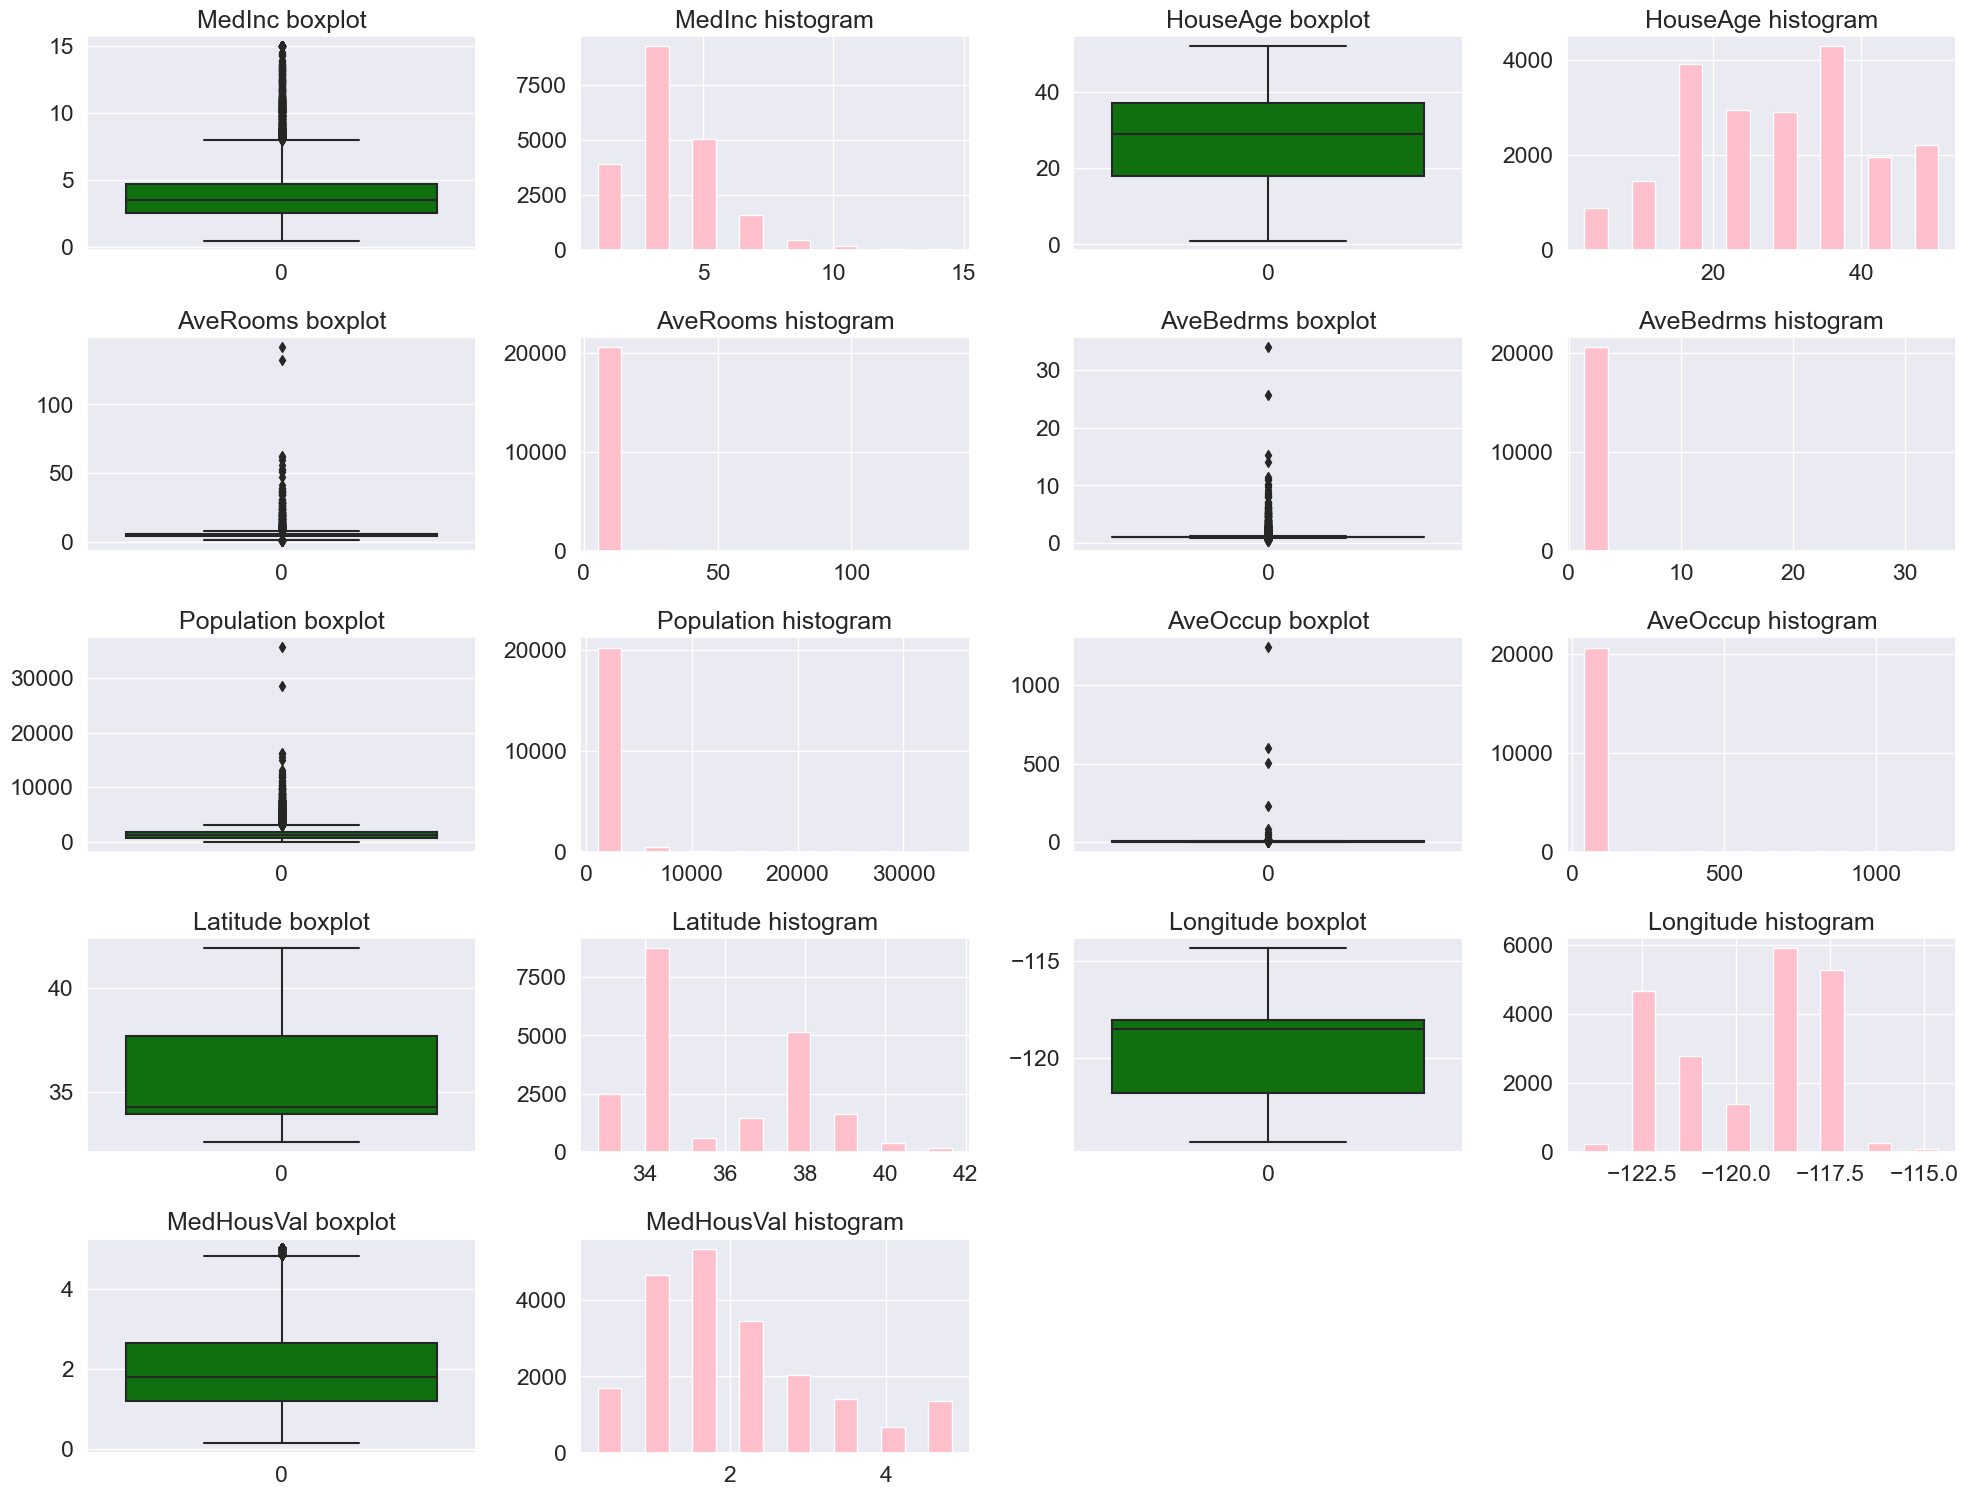

In [27]:
cont_vars = list(california_df.columns)
def outliers_visual(data):
    plt.figure(figsize=(20, 30))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        sns.boxplot(data[col],color='green')
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(10, 4, i)
        plt.hist(data[col],bins=8,rwidth=0.5,color='pink')
        plt.title('{} histogram'.format(col))
    plt.tight_layout()
    plt.show()
outliers_visual(california_df)

In [50]:
X = california_df.drop(["MedHousVal"],axis=1)
y =california_df.MedHousVal

# Splitting the data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train1,y_train1)
y_pred_train1 = regr.predict(X_train1)
y_pred_train1

array([1.77134447, 2.72738205, 2.03532959, ..., 1.80013935, 2.9267898 ,
       0.72288451])

In [52]:
MSE_train1 = mean_squared_error(y_train1, y_pred_train1)
print(f'MSE= {MSE_train1}')

RMSE_train1 = np.sqrt(MSE_train1)
print(f'RMSE= {RMSE_train1}')

R2_Score_train1 = r2_score(y_train1, y_pred_train1)
print(f'R2_Score= {R2_Score_train1}')

MSE= 0.6455261379712113
RMSE= 0.8034464126319883
R2_Score= 0.5176779109700802


In [53]:
X = california_df.drop(["MedHousVal"],axis=1)
y =california_df.MedHousVal

# Splitting the data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train1,y_train1)
y_pred_test1 = regr.predict(X_test1)
y_pred_test1

array([2.06573143, 2.95248339, 2.28774896, ..., 1.43659129, 2.85019533,
       2.26312211])

In [54]:
MSE_test1 = mean_squared_error(y_test1, y_pred_test1)
print(f'MSE= {MSE_test1}')

RMSE_test1 = np.sqrt(MSE_test1)
print(f'RMSE= {RMSE_test1}')

R2_Score_test1 = r2_score(y_test1, y_pred_test1)
print(f'R2_Score= {R2_Score_test1}')

MSE= 0.6697845423679839
RMSE= 0.8184036549087399
R2_Score= 0.4863437829184243


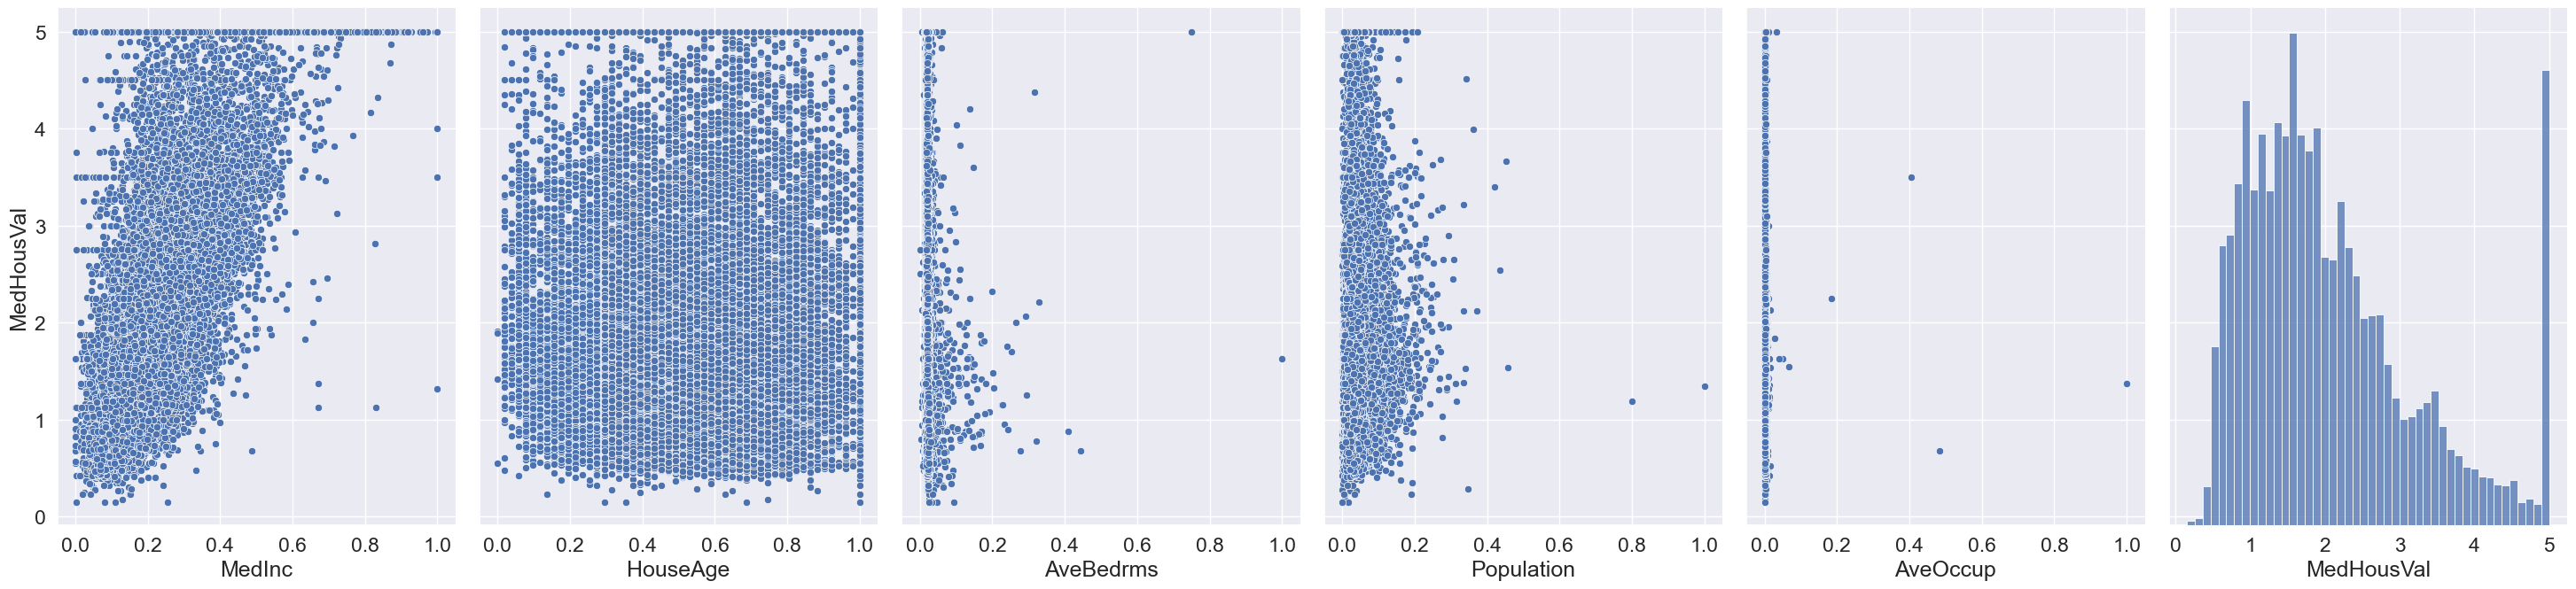

In [58]:
# Linearity
p = sns.pairplot(california_df,x_vars=california_df.columns,y_vars='MedHousVal', size=7,aspect = 0.7)
plt.tight_layout()
plt.show()

In [55]:
# It should be zero
residuals = y_train1.values - y_pred_train1
print(residuals)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

[ 3.22866553 -0.02738205 -0.07432959 ...  1.09286065  1.9192102
 -0.02888451]
Mean of Residuals 4.362089931297339e-16


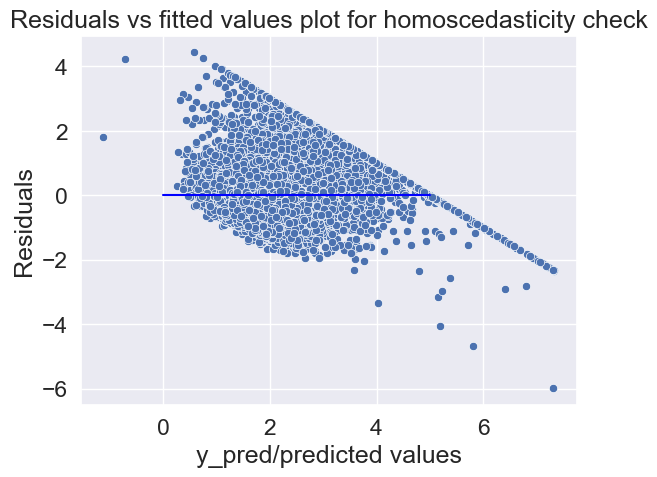

In [59]:
p = sns.scatterplot(x=y_pred_train1,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot(x=[0,5],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statstic','p-value']
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

[('F statstic', 0.9420250689012986), ('p-value', 0.9966581270294658)]

Homoscedastic

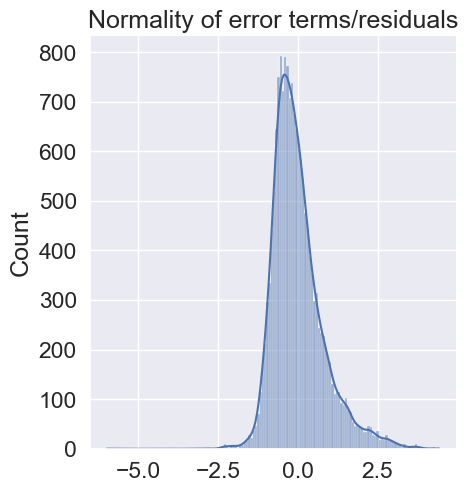

In [61]:
# normality
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Yes Normality.

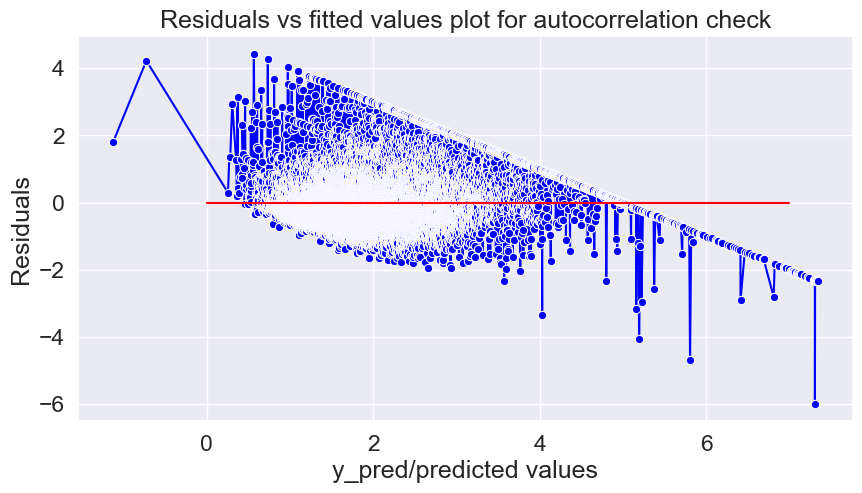

In [66]:

plt.figure(figsize=(10,5))
p = sns.lineplot(x= y_pred_train1,y= residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.xlim(-1,115)
#plt.ylim(-60,60)
p = sns.lineplot(x=[0,7],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')
fig.show()

In [68]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40))

'lb_pvalue'

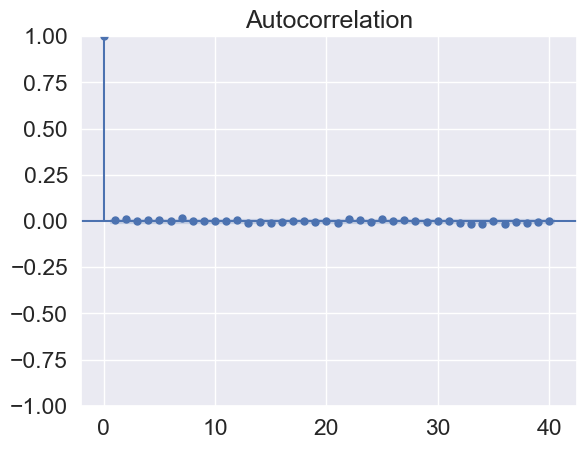

In [69]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

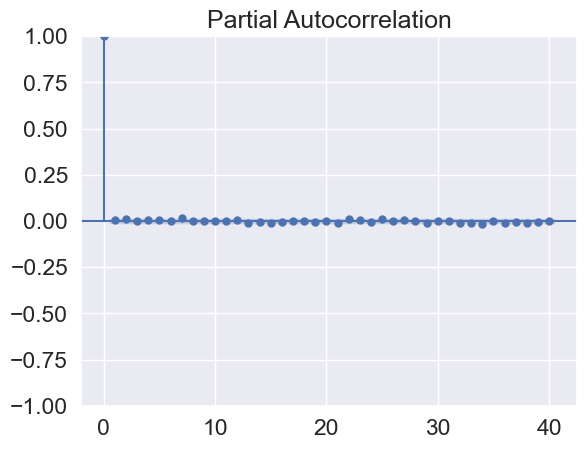

In [70]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

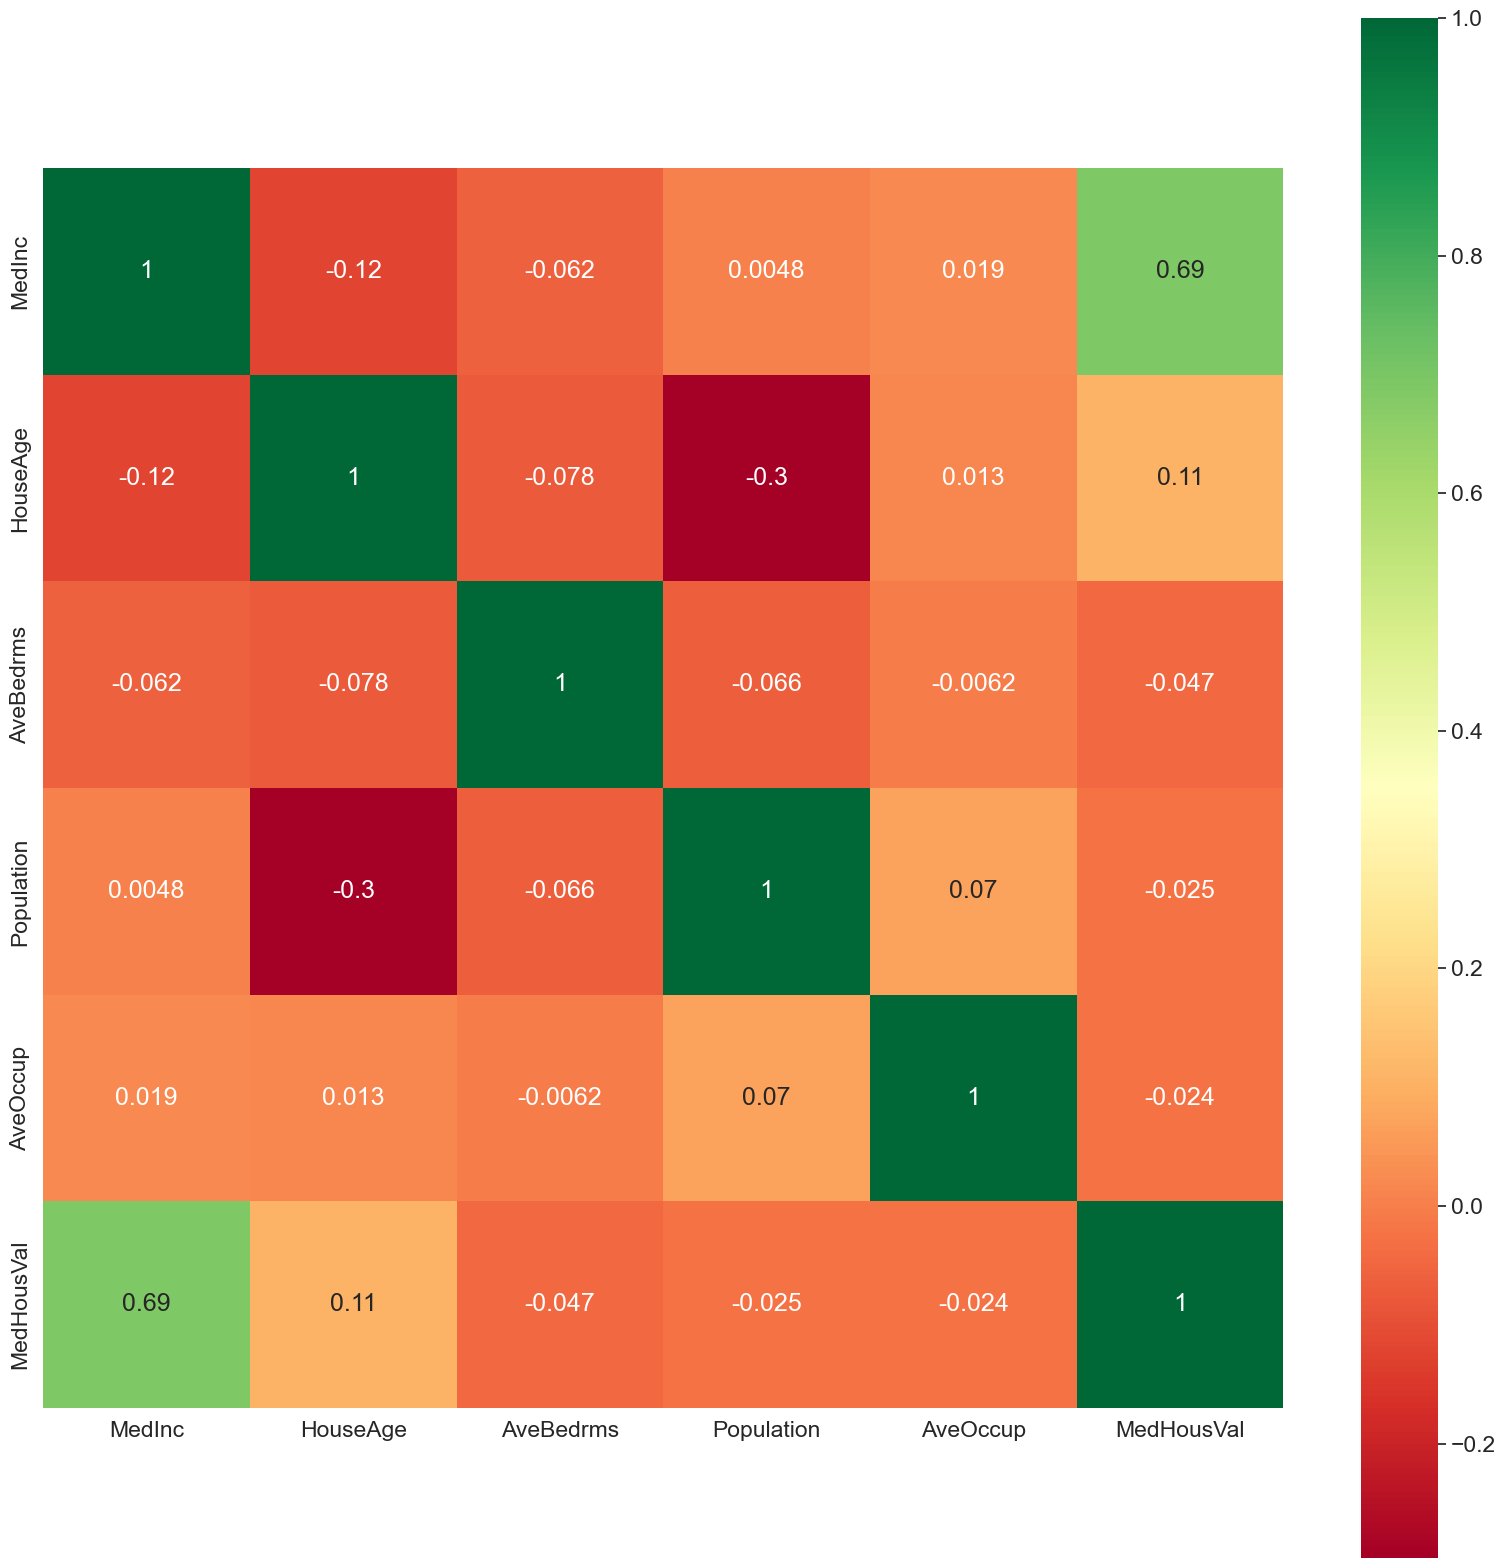

In [71]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(california_df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap